# Data Cleaning Fundamentals with Laptops data

In these project based exercises fundamental Data Cleaning operations are applied in Pandas to clean laptops data.

Fundamental data cleaning operations used to clean the data:
* Loading csv files with encodings
* Using a definition and for-loop to clean column names from characters and change it to snake case.
* Extracting string 0 as new names.
* Replacing / (stripping columns from substrings) substrings in column entries with ‘nothing’ and returning the entries as numerical values.
* Using a mapping dictionary to correct bad values.
* Dropping or filling missing values.
* Cleaning a string column.
* Saving the cleaned data to a different name in csv format.

These Pandas exercises was done through DataQuest and they also provided the dataset laptops.csv. Originally these exercises were done using pure Python, but I converted the code to run in this Jupyter Notebook. The original Python code is also available in the same file as this notebook.

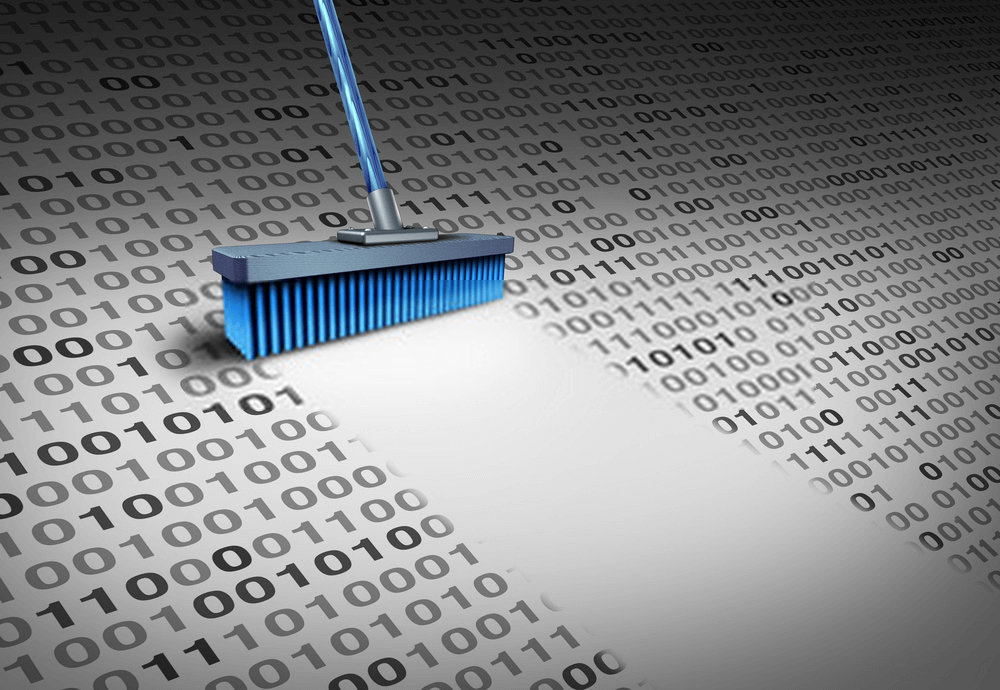

In [38]:
import pandas as pd

In [39]:
# Reading csv files with encodings

laptops = pd.read_csv("laptops.csv", encoding = "Latin-1")
laptops

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,"638,00"
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,"1499,00"
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,"229,00"
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,"764,00"


In [40]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [41]:
# We have 1303 rows (laptop entries) and 13 columns.
# The column names needs to be changed to snake case and all characters used must be removed.
# All of the columns are of the type "object", of which we will change some of them to numerical values (floats or integers).
# i.e.substrings will need to be removed from some columns containing them.
# We have missing values in the column "Operating System Version"

In [42]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [43]:
# Cleaning the column names (changing the column names to snake case and getting rid of used characters):

def clean_col(col):
    col = col.strip()
    col = col.replace("Operating System", "os")
    col = col.replace(" ", "_")
    col = col.replace("(", "")
    col = col.replace(")", "")
    col = col.lower()
    return col

new_columns = []

for c in laptops.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)
    
laptops.columns = new_columns

In [44]:
laptops.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight',
       'price_euros'],
      dtype='object')

In [45]:
# Viewing the unique ram sizes before cleaning the column:

ram = laptops["ram"]
unique_ram = ram.unique()
unique_ram

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [46]:
# Cleaning the ram column (getting rid of substrings and changing the values to numerical values):

laptops["ram"] = laptops["ram"].str.replace("GB", "").astype(int)
ram = laptops["ram"]

unique_ram = ram.unique()
unique_ram

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

In [47]:
type(unique_ram)

numpy.ndarray

In [48]:
dtypes = laptops.dtypes
dtypes

manufacturer    object
model_name      object
category        object
screen_size     object
screen          object
cpu             object
ram              int32
storage         object
gpu             object
os              object
os_version      object
weight          object
price_euros     object
dtype: object

In [49]:
# Changing the column name 'ram' to 'ram_gb':

laptops.rename({"ram":"ram_gb"}, axis = 1, inplace = True)

In [50]:
ram_gb = laptops["ram_gb"]

# The descriptive statistics for the ram_gb column is displayed:

ram_gb_desc = ram_gb.describe()
ram_gb_desc

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: ram_gb, dtype: float64

In [51]:
laptops.head(5)

,manufacturer,model_name,category,screen_size,screen,cpu,ram_gb,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [52]:
laptops['screen_size'].dtype

dtype('O')

In [53]:
# Renaming the column name 'screen_size' to 'screen_size_inches':

laptops.rename({"screen_size": "screen_size_inches"}, axis = 1, inplace = True)

In [54]:
# Cleaning the screen_size_inches column from characters and changing it to numerical values:

laptops['screen_size_inches'] = laptops['screen_size_inches'].str.strip('"').astype(float)

screensize_in = laptops["screen_size_inches"]
screensize_in

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: screen_size_inches, Length: 1303, dtype: float64

In [55]:
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


In [56]:
screen_size_unq = laptops["screen_size_inches"].unique()
screen_size_unq

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [57]:
# Changing the names of the gpu- and cpu-manufacturers:

laptops["gpu_manufacturer"] = (laptops["gpu"].str.split().str[0])
laptops["cpu_manufacturer"] = (laptops["cpu"].str.split().str[0])

In [58]:
cpu_manufacturer = laptops["cpu_manufacturer"]

# Determine which cpu manufacturer is the most popular:

cpu_manufacturer_counts = cpu_manufacturer.value_counts()
cpu_manufacturer_counts

Intel      1240
AMD          62
Samsung       1
Name: cpu_manufacturer, dtype: int64

In [59]:
# The 3 manufacturers of the central processing units of the laptops in our data are Intel, AMD and Samsung.
# Intel manufactured the most of the CPUs for the laptops.

In [60]:
# Using a mapping dictionary to change the descriptions in the os (operating system) column:

mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'ChromeOS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'NoOS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}
os = laptops["os"]

laptops["os"] = os.map(mapping_dict)

In [61]:
laptops['os'].unique()

array(['macOS', 'NoOS', 'Windows', 'Linux', 'Android', 'ChromeOS'],
      dtype=object)

In [62]:
# Dropping rows and columns which has missing data.  If this is done with the setting inplace = True, it will be changed in our
# original dataset.  When inplace = False (the default setting) a copy of the dataset is provided.

laptops_no_null_rows = laptops.dropna()
laptops_no_null_cols = laptops.dropna(axis = 1)

In [63]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   manufacturer        1303 non-null   object 
 1   model_name          1303 non-null   object 
 2   category            1303 non-null   object 
 3   screen_size_inches  1303 non-null   float64
 4   screen              1303 non-null   object 
 5   cpu                 1303 non-null   object 
 6   ram_gb              1303 non-null   int32  
 7   storage             1303 non-null   object 
 8   gpu                 1303 non-null   object 
 9   os                  1303 non-null   object 
 10  os_version          1133 non-null   object 
 11  weight              1303 non-null   object 
 12  price_euros         1303 non-null   object 
 13  gpu_manufacturer    1303 non-null   object 
 14  cpu_manufacturer    1303 non-null   object 
dtypes: float64(1), int32(1), object(13)
memory usage: 147.7

In [64]:
# Displaying the number of missing values for each operating system in the os (operating system) column:

value_counts_before = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()
value_counts_before

NoOS        66
Linux       62
ChromeOS    27
macOS       13
Android      2
Name: os, dtype: int64

In [65]:
# Repalcing the missing values for the operating system version of Mac OS to "X":

laptops.loc[laptops["os"] == "macOS", "os_version"] = "X"

In [66]:
# Replacing the missing values for the 'No operating system' version to "Version Unknown"

no_os = laptops["os"] == "NoOS"
laptops.loc[no_os, "os_version"] = "Version Unknown"

In [67]:
# Viewing the number of missing values that remains:

value_counts_after = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()

In [68]:
value_counts_after

Linux       62
ChromeOS    27
Android      2
Name: os, dtype: int64

In [69]:
# Viewing the unique laptop entries to see which unique substrings have been used:

laptops["weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [70]:
laptops.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size_inches',
       'screen', 'cpu', 'ram_gb', 'storage', 'gpu', 'os', 'os_version',
       'weight', 'price_euros', 'gpu_manufacturer', 'cpu_manufacturer'],
      dtype='object')

In [71]:
# The substrings 'kg' and 'kgs' have been used in the laptop weight column.

In [72]:
# Removing the substrings from the weight column and changing the column entries to numerical values:

laptops["weight"] = laptops["weight"].str.replace("kgs","").str.replace("kg","").astype(float)

# Renaming the laptops weight column to "weight_kg"

laptops.rename({"weight":"weight_kg"}, axis = 1, inplace = True)

In [73]:
# Saving the changes made to the laptops data:

laptops.to_csv("laptops_clean.csv", index = False)